2021-12-15 모델 만듬
랜덤포레스트 애큐러시 0.78

2021-12-16 생일피처 추가 
랜덤포레스트 애큐러시 0.80

다음 할일 

1. 주택종류를 피처로 추가 
2. 거주형태를 피처로 추가- 완료 
3. 생일피처 추가- 완료
4. 모델 xgb, lgb , svd 등 모델 추가 돌려보기
5. 그리드 서치 cv로 파라 메터 수정
6. EDA 그래프 3-4개정도 그려보기 


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
Customer_df=pd.read_csv('/content/drive/MyDrive/기말프로젝트_데이터공유불가/Customers.csv')
Transcations_df=pd.read_csv('/content/drive/MyDrive/기말프로젝트_데이터공유불가/Transactions.csv')

In [ ]:
Customer_df.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1
0,1,0,$null$,-1,1,A,1,17,4110,7,37
1,2,0,$null$,-1,1,N,1,17,7060,7,31
2,3,0,$null$,-1,1,A,2,17,4070,6,22
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1


In [ ]:
Customer_df.shape

(49995, 11)

In [ ]:
Transcations_df.head()

,sales_date,custid,goodcd,brd_nm,team_nm,part_nm,pc_nm,corner_nm,tot_amt,dis_amt,net_amt
0,2000-05-01 00:00:00,7595,2700000000000,식품,식품팀,공산품,일반식품,주류,28000,0,28000
1,2000-05-01 00:00:00,36860,2700000000000,식품,식품팀,공산품파트,일반식품,차류,59700,0,59700
2,2000-05-01 00:00:00,48385,4125270007985,슈프리미아,잡화가용팀,잡화파트,장신구,화장잡화,17000,0,17000
3,2000-05-01 00:00:00,29611,4508720043900,삼운/브로니,잡화가용팀,가정용품,식기,욕실용품,14000,700,13300
4,2000-05-01 00:00:00,16457,4120441805900,베네통토탈,의류패션팀,영플라자,소품,피혁토탈(B2),5800,290,5510


In [ ]:
Transcations_df.shape

(1726430, 11)

In [ ]:
Customer_df.info()
Transcations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   custid     49995 non-null  int64 
 1   sex        49995 non-null  int64 
 2   birth      49995 non-null  object
 3   birth_flg  49995 non-null  int64 
 4   mrg_flg    49995 non-null  int64 
 5   h_type1    49995 non-null  object
 6   h_type2    49995 non-null  int64 
 7   hobby      49995 non-null  int64 
 8   job_stype  49995 non-null  int64 
 9   cus_stype  49995 non-null  int64 
 10  m_time1    49995 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726430 entries, 0 to 1726429
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   sales_date  object
 1   custid      int64 
 2   goodcd      int64 
 3   brd_nm      object
 4   team_nm     object
 5   part_nm     object
 6   pc_nm       object
 7   

# **EDA**

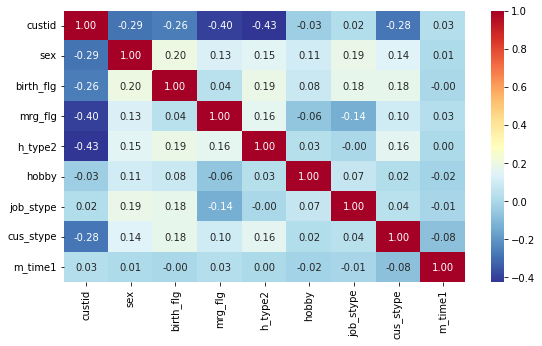

In [ ]:
corr = Customer_df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'RdYlBu_r' , annot=True , fmt = '.2f')

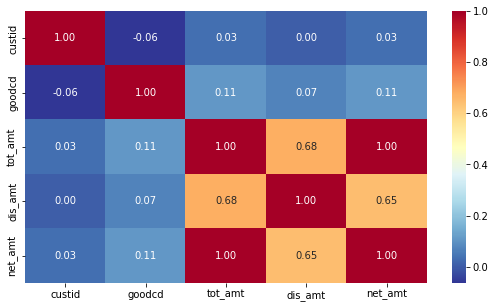

In [ ]:
corr = Transcations_df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'RdYlBu_r' , annot=True , fmt = '.2f')

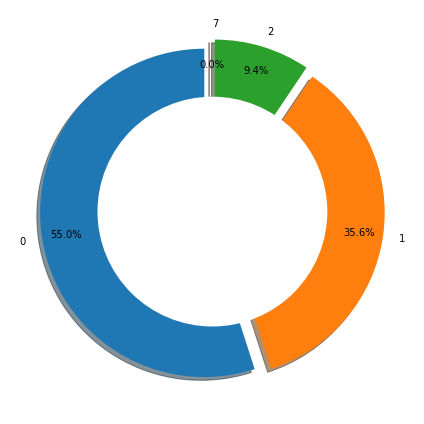

In [ ]:
# 파이플롯
plt.figure(figsize = (6,6))
plt.pie(Customer_df['mrg_flg'].value_counts(),  labels = ['0','1','2','7'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05,0.05,0.05), shadow = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

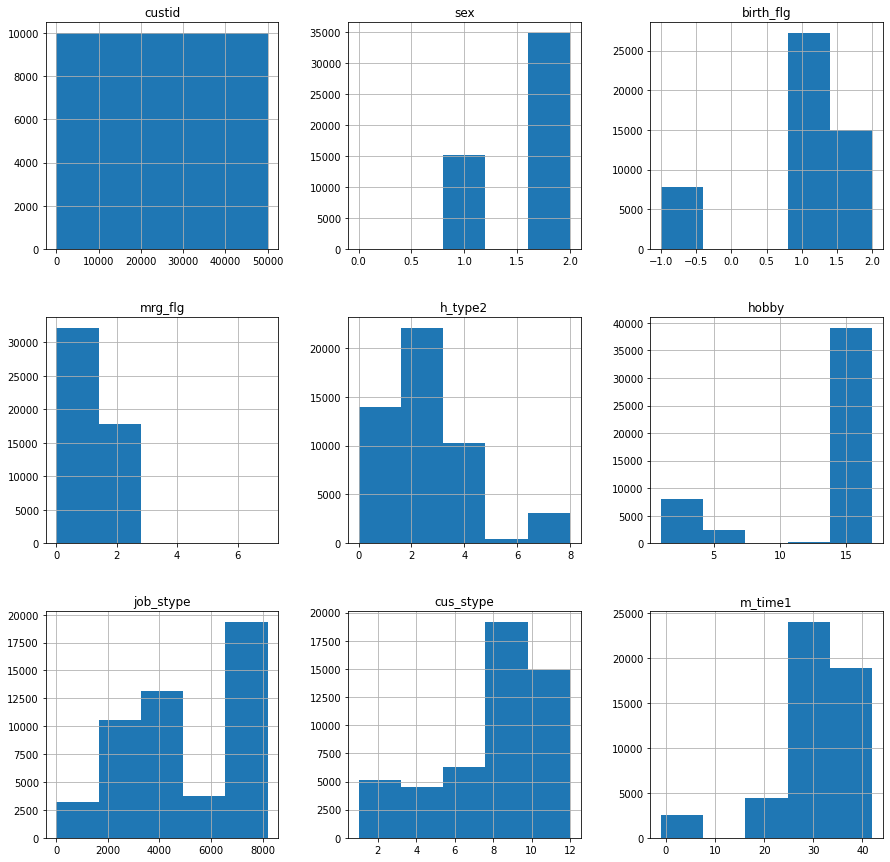

In [ ]:
Customer_df.hist(bins=5, figsize=(15,15));

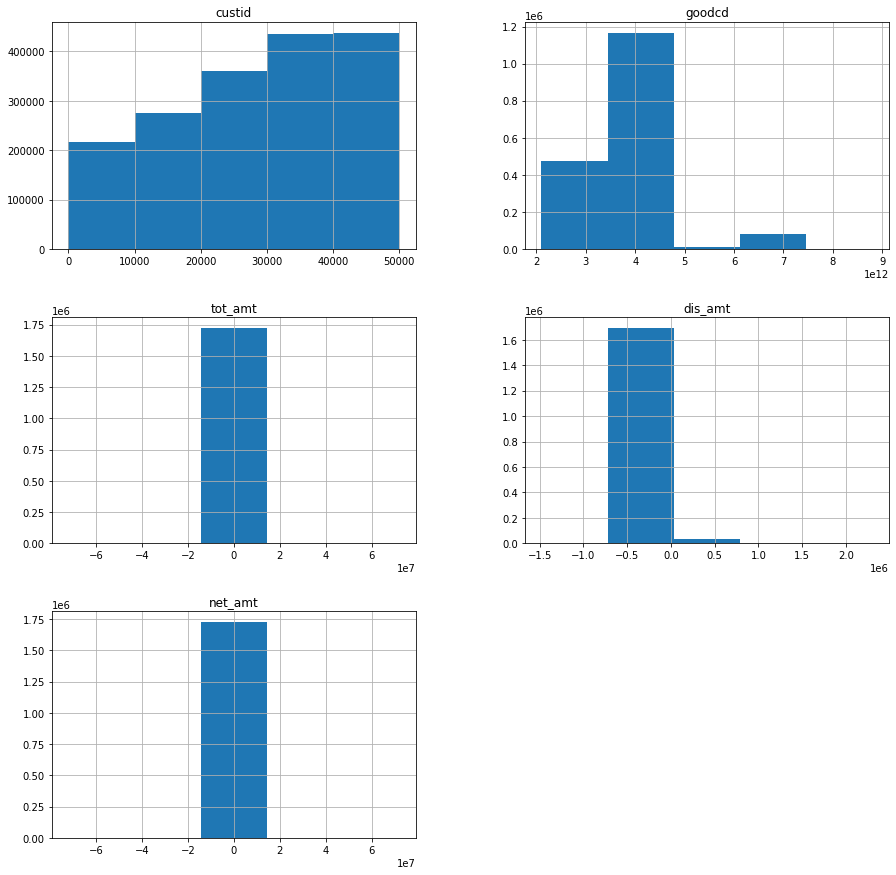

In [ ]:
Transcations_df.hist(bins=5, figsize=(15,15));

In [ ]:
# 생일 null값 삭제
idx_nm_1 = Customer_df[Customer_df['birth'] == '$null$'].index
Customer_df= Customer_df.drop(idx_nm_1)

In [ ]:
Customer_df.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1
5,6,2,1981-11-12 00:00:00,1,2,N,3,17,7060,9,38
6,7,2,1981-10-17 00:00:00,1,2,N,3,17,1120,9,-1
7,8,2,1981-06-25 00:00:00,1,2,V,3,17,4520,3,40


In [ ]:
# 생일 나누기
Customer_df['birth'] = pd.to_datetime(Customer_df['birth'], errors = 'coerce')
Customer_df['birth'] = pd.to_datetime(Customer_df['birth'], format='%Y-%m-%d')
Customer_df['birth_year'] = Customer_df['birth'].dt.year

In [ ]:
# sales date - 월 , 요일 , 주중/주말 특성 추가 
Transcations_df['sales_date'] = pd.to_datetime(Transcations_df['sales_date'], format='%Y-%m-%d')
Transcations_df['month'] = Transcations_df['sales_date'].dt.month
Transcations_df['weekday'] = Transcations_df['sales_date'].dt.dayofweek
Transcations_df['weekend'] = Transcations_df['weekday'].apply(lambda x: 1 if (x==5 or x==6) else 0)

In [ ]:
# dis_amt - 할인율 특성 추가
Transcations_df['dis_rate'] = Transcations_df['dis_amt']/Transcations_df['tot_amt']

In [ ]:
# count 구매건수 추가
Transcations_df['count'] = 1

In [ ]:
# 유저별 총 구매건수 특성 추가
sales_freq = pd.pivot_table(Transcations_df, index='custid',values='count',aggfunc=sum, fill_value=0 )

In [ ]:
# 주말 구매비율
wd_sales_rate = Transcations_df.groupby('custid')['weekend'].sum()/sales_freq['count']

In [ ]:
# 주말 구매비율의 컬럼명 변경
wd_sales_rate=pd.DataFrame(wd_sales_rate)
wd_sales_rate.columns=["wd_sales_rate"]

In [ ]:
# 피처 테이블 생성
features= pd.merge(sales_freq,wd_sales_rate, how='outer',on='custid')

In [ ]:
# 주거 현황 추가 
features['h_type2'] = Customer_df['h_type2']

In [ ]:
features['birth_year']= Customer_df['birth_year']


In [ ]:
# 자주 가는 월 평균
features['month_mean'] = Transcations_df.groupby('custid')['month'].mean()

# 총, 최대, 최소, 평균 구매액
features['tot_sales_amt'] = Transcations_df.groupby('custid')['net_amt'].sum()
features['max_amt'] = Transcations_df.groupby('custid')['net_amt'].max()
features['min_amt'] = Transcations_df.groupby('custid')['net_amt'].min()
features['mean_amt'] = round(Transcations_df.groupby('custid')['net_amt'].mean(),2)

In [ ]:
# 총 할인금액
features['tot_dis_amt'] = Transcations_df.groupby('custid')['dis_amt'].sum()

# 최대, 평균 할인율
features['max_dis'] = Transcations_df.groupby('custid')['dis_rate'].max()
features['mean_dis'] = Transcations_df.groupby('custid')['dis_rate'].mean()


In [ ]:
# 할인 받은 빈도, 비율
features['dis_freq'] = Transcations_df.query("dis_rate>0").groupby('custid')['dis_rate'].count()
features['dis_freq_rate'] = features['dis_freq']/features['count']

In [ ]:
# 선호 브랜드
df = pd.merge(Customer_df, Transcations_df, on='custid')
mar_prefer_brd = df.query("mrg_flg==1").brd_nm.value_counts().index[2:12].tolist()
sin_prefer_brd = df.query("mrg_flg==2").brd_nm.value_counts().index[2:12].tolist()

In [ ]:
def map_mar_brd(x):
    if x == mar_prefer_brd[0]:
        x=10
    elif x == mar_prefer_brd[1]:
        x=9
    elif x == mar_prefer_brd[2]:
        x=8
    elif x == mar_prefer_brd[3]:
        x=7
    elif x == mar_prefer_brd[4]:
        x=6
    elif x == mar_prefer_brd[5]:
        x=5
    elif x == mar_prefer_brd[6]:
        x=4
    elif x == mar_prefer_brd[7]:
        x=3
    elif x == mar_prefer_brd[8]:
        x=2
    elif x == mar_prefer_brd[9]:
        x=1
    else:
        x=0
    
    return x

In [ ]:
def map_sin_brd(x):
    if x == sin_prefer_brd[0]:
        x=10
    elif x == sin_prefer_brd[1]:
        x=9
    elif x == sin_prefer_brd[2]:
        x=8
    elif x == sin_prefer_brd[3]:
        x=7
    elif x == sin_prefer_brd[4]:
        x=6
    elif x == sin_prefer_brd[5]:
        x=5
    elif x == sin_prefer_brd[6]:
        x=4
    elif x == sin_prefer_brd[7]:
        x=3
    elif x == sin_prefer_brd[8]:
        x=2
    elif x == sin_prefer_brd[9]:
        x=1
    else:
        x=0
    
    return x

In [ ]:
Transcations_df['mar_brd_point'] = Transcations_df['brd_nm'].apply(map_mar_brd)
Transcations_df['sin_brd_point'] = Transcations_df['brd_nm'].apply(map_sin_brd)

features['mar_brd_point'] = Transcations_df.groupby('custid')['mar_brd_point'].mean()
features['sin_brd_point'] = Transcations_df.groupby('custid')['sin_brd_point'].mean()

In [ ]:
# 기/미혼자별  인기있는 상위 10개 제품의 구성비를 고객별로 평균냄
lst = df.query("mrg_flg==1").goodcd.value_counts().index[:10]
value_list = []

for i in range(10):
    a = lst[i]
    part = df.query("mrg_flg==1")[df.query("mrg_flg==1").goodcd == a].shape[0]
    total = df.query("mrg_flg==1").shape[0]
    value = round(part/ total,5)
    value_list.append(value)

value_array = np.array(value_list)
df1 = pd.DataFrame({'goodcd':lst, 'value_mar':value_array})
data = pd.merge(Transcations_df, df1, how='left', on='goodcd')
data.fillna(9999, inplace=True)
features['value_mar'] = data.groupby('custid')['value_mar'].mean()

In [ ]:
lst = df.query("mrg_flg==2").goodcd.value_counts().index[:10]
value_list = []

for i in range(10):
    a = lst[i]
    part = df.query("mrg_flg==2")[df.query("mrg_flg==2").goodcd == a].shape[0]
    total = df.query("mrg_flg==2").shape[0]
    value = round(part/ total,5)
    value_list.append(value)

value_array = np.array(value_list)
df2 = pd.DataFrame({'goodcd':lst, 'value_sin':value_array})
data = pd.merge(Transcations_df, df2, how='left', on='goodcd')
data.fillna(9999, inplace=True)
features['value_sin'] = data.groupby('custid')['value_sin'].mean()

In [ ]:
features.head()

,count,wd_sales_rate,h_type2,birth_year,month_mean,tot_sales_amt,max_amt,min_amt,mean_amt,tot_dis_amt,max_dis,mean_dis,dis_freq,dis_freq_rate,mar_brd_point,sin_brd_point,value_mar,value_sin
custid,,,,,,,,,,,,,,,,,,
1,77,0.298701,NaN,NaN,6.376623,3758381,509000,-191920,48810.14,42100,0.050118,0.009092,14.0,0.181818,0.000000,0.000000,4934.694810,4934.648066
2,28,0.142857,NaN,NaN,6.285714,2061179,298300,-131100,73613.54,71150,0.050000,0.024773,14.0,0.500000,0.785714,0.321429,8213.499469,8213.486373
3,68,0.250000,4.0,1982.0,6.117647,6426049,1858000,-862000,94500.72,65590,0.050061,0.016961,26.0,0.382353,0.000000,0.000000,9410.837859,9410.832430
4,6,0.500000,3.0,1982.0,5.666667,381300,115200,8000,63550.00,28100,0.100000,0.041667,3.0,0.500000,0.666667,1.000000,6666.041823,6666.027148
5,4,0.250000,3.0,1981.0,4.000000,155700,83700,18000,38925.00,17300,0.100000,0.100000,4.0,1.000000,2.250000,0.000000,7499.252098,7499.254193


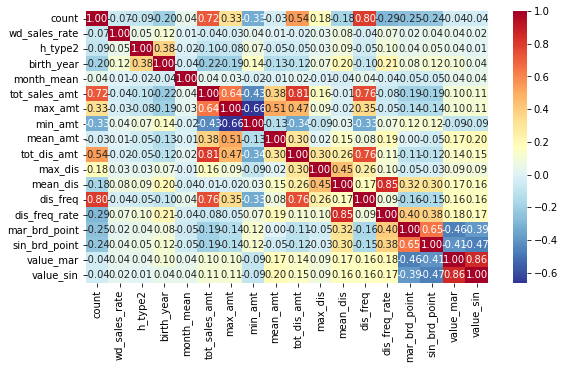

In [ ]:
corr = features.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'RdYlBu_r' , annot=True , fmt = '.2f')

구매횟수와 구매액, 할인빈도, 할인액이 상관관계가 높음 ( 당연한 결과인듯 )
주거형태와 생일이 상관관계가 있다. ( 나이에 따라 주거형태가 관계가 있다 )
대부분 금액과 관련되어 상관관계가 나타남 

(array([2.1000e+01, 1.0000e+01, 1.5200e+02, 9.3600e+02, 3.9040e+03,
        7.0760e+03, 1.1496e+04, 1.8319e+04, 1.5600e+02, 7.8000e+01]),
 array([1900. , 1909.9, 1919.8, 1929.7, 1939.6, 1949.5, 1959.4, 1969.3,
        1979.2, 1989.1, 1999. ]),
 <a list of 10 Patch objects>)

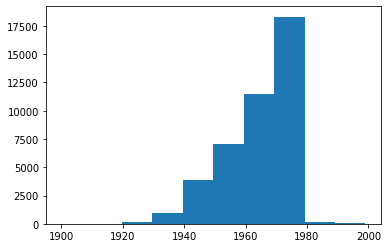

In [ ]:
plt.hist(features['birth_year'])

출생년도로 볼때 결혼적령기의 데이터가 많다

(array([   18.,  9856.,  6249., 12738.,     0., 10100.,   287.,   119.,
         2721.,    63.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

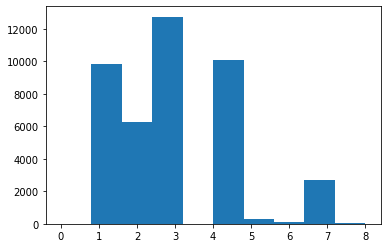

In [ ]:
plt.hist(features['h_type2'])

전세보다 자가비율이 높음?

In [ ]:
# 학습데이터 생성
Train_df = pd.merge(Customer_df, features, how='outer', on='custid')
Train_df1 = Train_df.drop(columns = ['birth','h_type1'])
Train_df2 = Train_df1.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 정제
Train_df1_x_data = Train_df2.drop(['mrg_flg'],axis=1)
Train_df1_y_data = Train_df2['mrg_flg']

In [ ]:
# 학습데이터 분할
x_train, x_test, y_train, y_test = train_test_split(Train_df1_x_data, Train_df1_y_data, test_size=0.3, random_state=777)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)

In [ ]:
print('랜덤포레스트 정확도: {}'.format(rf.score(x_test,y_test)))

랜덤포레스트 정확도: 0.8029868657910527


In [ ]:
from sklearn.metrics import classification_report
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

         0.0       0.98      0.64      0.78      3625
         1.0       0.79      0.88      0.83      6397
         2.0       0.74      0.82      0.78      4977

    accuracy                           0.80     14999
   macro avg       0.84      0.78      0.80     14999
weighted avg       0.82      0.80      0.80     14999



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_cla = XGBClassifier(n_estimators=50)

xgb_cla.fit(x_train,y_train)
y_predict = xgb_cla.predict(x_test)

print('XGBoost 정확도: {}'.format(xgb_cla.score(x_test,y_test)))

xgb_REPORT = classification_report(y_test, y_predict)
print(xgb_REPORT)

XGBoost 정확도: 0.8043869591306088
              precision    recall  f1-score   support

         0.0       0.99      0.63      0.77      3625
         1.0       0.79      0.89      0.84      6397
         2.0       0.74      0.82      0.78      4977

    accuracy                           0.80     14999
   macro avg       0.84      0.78      0.80     14999
weighted avg       0.82      0.80      0.80     14999



In [ ]:
lgbm_cla = LGBMClassifier(n_estimators=50)

lgbm_cla.fit(x_train,y_train)
y_predict = lgbm_cla.predict(x_test)

print('LGBM 정확도: {}'.format(lgbm_cla.score(x_test,y_test)))

lgbm_REPORT = classification_report(y_test, y_predict)
print(lgbm_REPORT)

LGBM 정확도: 0.799453296886459
              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77      3625
         1.0       0.79      0.88      0.83      6397
         2.0       0.74      0.81      0.77      4977

    accuracy                           0.80     14999
   macro avg       0.83      0.78      0.79     14999
weighted avg       0.81      0.80      0.80     14999



In [ ]:
gbm_cla = GradientBoostingClassifier(n_estimators=50)

gbm_cla.fit(x_train,y_train)
y_predict = gbm_cla.predict(x_test)

print('GBM 정확도: {}'.format(gbm_cla.score(x_test,y_test)))

gbm_REPORT = classification_report(y_test, y_predict)
print(gbm_REPORT)

GBM 정확도: 0.8062537502500167
              precision    recall  f1-score   support

         0.0       0.98      0.64      0.78      3625
         1.0       0.79      0.89      0.84      6397
         2.0       0.75      0.81      0.78      4977

    accuracy                           0.81     14999
   macro avg       0.84      0.78      0.80     14999
weighted avg       0.82      0.81      0.80     14999



모델 선택 

정확도는 2번째이나 그 차이가 미미하고 속도가 GBM에 비해 월등히 빨라서 XGB선택 

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCv를 이용한 하이퍼 파라미터 튜닝.
tuned_parameters = {'n_estimators': [100,200,300,500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

xgb_cla = GridSearchCV(XGBClassifier(), tuned_parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_cla.fit(x_train, y_train)
pred = xgb_cla.predict(x_test)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.79580546 0.80043446 0.80280618 0.80534927 0.79580546 0.80043446
 0.80280618 0.80534927 0.79580546 0.80043446 0.80280618 0.80534927
 0.80397774 0.80729238 0.80746385 0.80709234 0.80397774 0.80729238
 0.80746385 0.80709234 0.80397774 0.80729238 0.80746385 0.80709234
 0.8078067  0.80823532 0.80829247 0.80760668 0.8078067  0.80823532
 0.80829247 0.80760668 0.8078067  0.80823532 0.80829247 0.80760668]
  category=UserWarning,


In [ ]:
print(xgb_cla.best_params_)
print(xgb_cla.best_score_)

{'max_depth': 3, 'min_samples_split': 1, 'n_estimators': 300}
0.8082924703529075
